# **Exp 1**: Different Cashier, Same Customer

In [1]:
import pygame
import sys
import random
import time
import matplotlib.pyplot as plt

# Initialize pygame
pygame.init()

# Screen attributes
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Cashier positions
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]

# Customer array
customers = []

# Total serving time for each cashiers
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Function to add a customer
def add_customer(cols):
    # Queue amount
    rows = 5
    # Place the customer on the cashier queue randomly
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Function to draw the customer
def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

# Function to draw the cashier
def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Main function
def main():
    clock = pygame.time.Clock()
    serving_time = 20 
    add_customer_time = 10 
    day_count = 1

    while day_count <= 30:
        # Items bought by customer (random)
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.8, 0.2]  # 1-5 items: 20%, 5-10 items: 80%

        # Amount of cashier based on the day type
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Saturday (6) dan Sunday (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
        else:  # Monday (1) to Friday (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulate 8 hours per day
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Initiliaze served customer

            # Amount of customers per hour
            max_customers = random.randint(30, 50)
            
            # Handle events
            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Time now
                current_time = pygame.time.get_ticks()

                # Add customer randomly
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 998.5394186296305, 2: 1002.4618191896319, 3: 1072.7386086805502, 4: 1009.8470128663668, 5: 934.4885884064557, 6: 580.0577760706398, 7: 674.5056204105911, 8: 1089.9602122893941, 9: 1042.0629029584757, 10: 1117.0309624590268, 11: 983.2502874262292, 12: 969.3813648044901, 13: 642.8698122213542, 14: 606.716477044283, 15: 1097.673402378095, 16: 702.0273854122162, 17: 655.5807646416928, 18: 726.5928377055076, 19: 719.3403087412717, 20: 370.33172000242416, 21: 380.88939328499555, 22: 668.7468555460912, 23: 655.740896171699, 24: 611.5405452396901, 25: 591.9035314024081, 26: 636.0484037741365, 27: 386.7986626041789, 28: 344.10908979076373, 29: 604.0639508275957, 30: 633.7145928702189}
Average Customers Served per Day: {1: 102.33333333333333, 2: 111.33333333333333, 3: 105.66666666666667, 4: 104.0, 5: 98.66666666666667, 6: 60.8, 7: 66.6, 8: 1

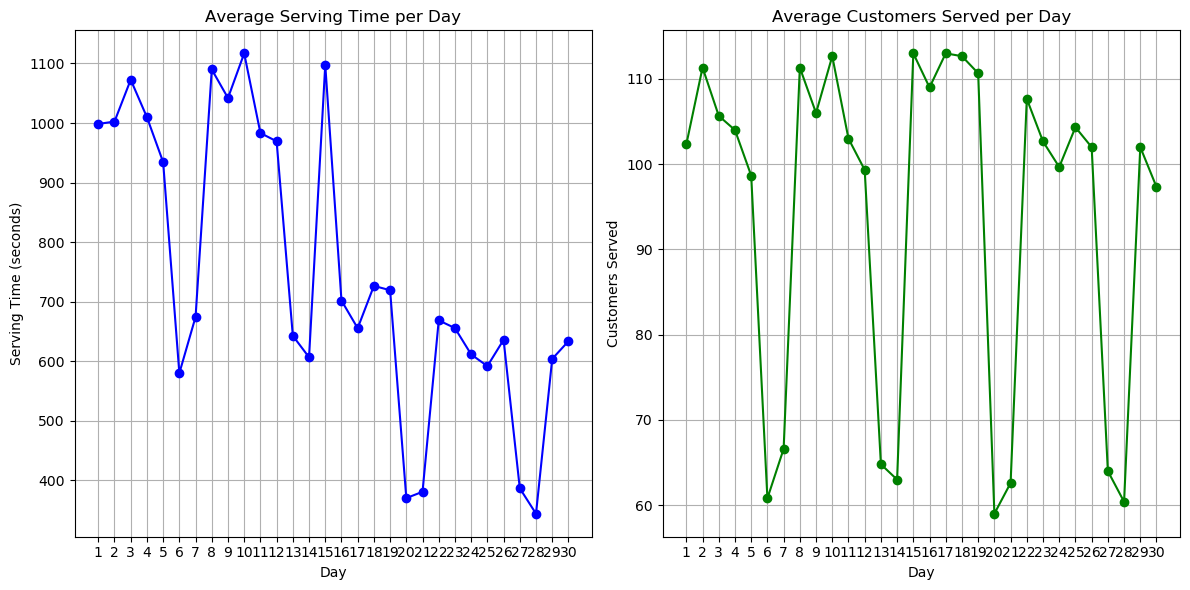

: 

In [2]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **Exp 2**: Same Cashier, Different Customer

In [1]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
# weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
weekend_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 20  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.8, 0.2]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (50, 80)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (30, 50)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(*max_customers_range)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 987.0983939537107, 2: 992.2810793458534, 3: 1073.4269270408802, 4: 1070.824060970135, 5: 1127.2643594026458, 6: 1746.1256587180296, 7: 1608.3858720105964, 8: 1081.819414628038, 9: 1090.4025684672285, 10: 1064.3556518268558, 11: 1019.5751647343002, 12: 1117.7007412556677, 13: 1643.368946596543, 14: 1786.456991441218, 15: 918.4465845296756, 16: 666.2580495593413, 17: 645.2096340350547, 18: 794.7711538229374, 19: 620.4543711467547, 20: 1071.2105939971802, 21: 1138.1146302005716, 22: 631.2371742741927, 23: 678.059464405259, 24: 658.0149811609933, 25: 638.0197006547768, 26: 624.5409048107514, 27: 1126.8336799192539, 28: 1035.8920193298936, 29: 680.9669256137536, 30: 662.3609688993267}
Average Customers Served per Day: {1: 104.33333333333333, 2: 102.33333333333333, 3: 109.0, 4: 103.66666666666667, 5: 115.66666666666667, 6: 174.0, 7: 173.

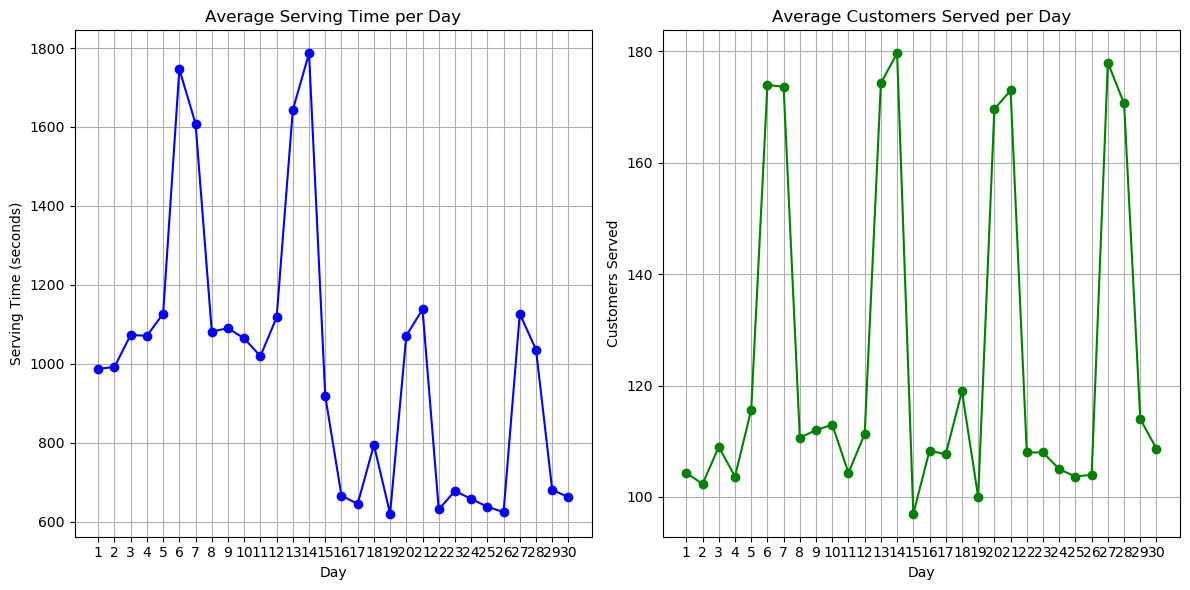

: 

In [2]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **Exp 3**: Different Cashier, Different Customer

In [1]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 20  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.8, 0.2]  # 1-5 items: 80%, 5-10 items: 20%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
            max_customers_range = (50, 80)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (30, 50)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(*max_customers_range)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 1035.0898658420392, 2: 1089.2091319367046, 3: 1095.7999105842343, 4: 1116.1801536672745, 5: 988.6110614145938, 6: 1116.7558203075719, 7: 1003.3221738894224, 8: 1044.5508486740816, 9: 1003.5819628413933, 10: 1075.8426753128822, 11: 1034.9753630670864, 12: 1136.7902566070288, 13: 1113.3679410312855, 14: 1011.4433804607054, 15: 1106.137976579938, 16: 684.1026988132693, 17: 582.9962264224636, 18: 638.3876581626554, 19: 564.4979984436116, 20: 627.4769977808265, 21: 582.4653166464088, 22: 663.3510493093765, 23: 564.7008086391161, 24: 617.2501256665008, 25: 615.4671521384973, 26: 723.6976624356896, 27: 593.1165246257342, 28: 594.3498271779785, 29: 644.7235349899173, 30: 625.7497800023656}
Average Customers Served per Day: {1: 103.66666666666667, 2: 109.0, 3: 111.33333333333333, 4: 113.66666666666667, 5: 105.0, 6: 112.8, 7: 109.0, 8: 103.6

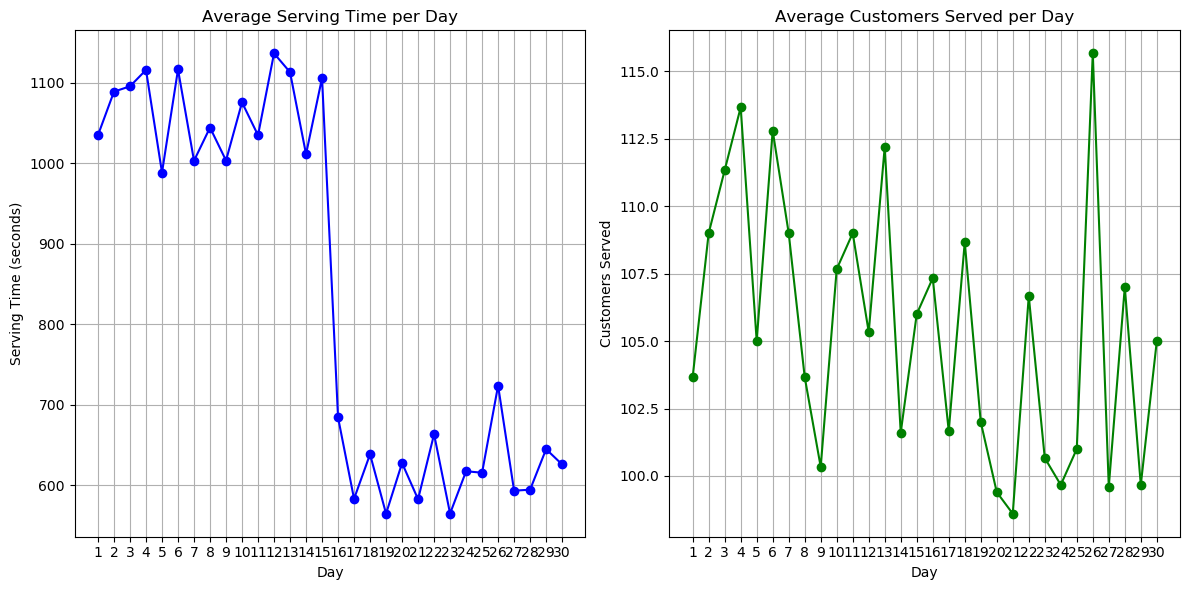

: 

In [2]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **End**